Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### Read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
data_dir_train = pathlib.Path('Train')
data_dir_test = pathlib.Path('Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
# Defining the image_size which is img_height * img_width

In [6]:
image_size = (180, 180)

Use 80% of the images for training, and 20% for validation.

In [7]:
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Train",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Train",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [10]:
np.unique(train_ds, return_counts=True)

(array([<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>],
       dtype=object),
 array([1], dtype=int64))

### Visualize the data

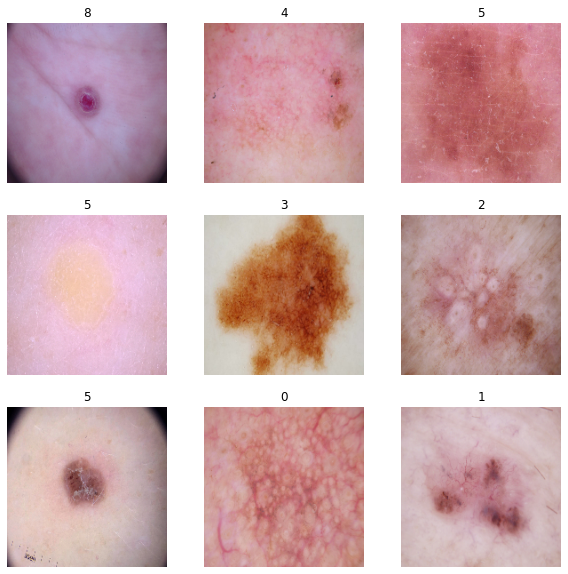

In [11]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Create DataFrame for original data set

In [13]:
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train,'*','*.jpg'))]

In [14]:
lesion_list

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [15]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [16]:
path_list

['Train\\actinic keratosis\\ISIC_0025780.jpg',
 'Train\\actinic keratosis\\ISIC_0025803.jpg',
 'Train\\actinic keratosis\\ISIC_0025825.jpg',
 'Train\\actinic keratosis\\ISIC_0025953.jpg',
 'Train\\actinic keratosis\\ISIC_0025957.jpg',
 'Train\\actinic keratosis\\ISIC_0025992.jpg',
 'Train\\actinic keratosis\\ISIC_0026040.jpg',
 'Train\\actinic keratosis\\ISIC_0026149.jpg',
 'Train\\actinic keratosis\\ISIC_0026171.jpg',
 'Train\\actinic keratosis\\ISIC_0026194.jpg',
 'Train\\actinic keratosis\\ISIC_0026212.jpg',
 'Train\\actinic keratosis\\ISIC_0026457.jpg',
 'Train\\actinic keratosis\\ISIC_0026468.jpg',
 'Train\\actinic keratosis\\ISIC_0026525.jpg',
 'Train\\actinic keratosis\\ISIC_0026575.jpg',
 'Train\\actinic keratosis\\ISIC_0026625.jpg',
 'Train\\actinic keratosis\\ISIC_0026626.jpg',
 'Train\\actinic keratosis\\ISIC_0026650.jpg',
 'Train\\actinic keratosis\\ISIC_0026702.jpg',
 'Train\\actinic keratosis\\ISIC_0026709.jpg',
 'Train\\actinic keratosis\\ISIC_0026729.jpg',
 'Train\\acti

In [17]:
dataframe_dict = dict(zip(path_list, lesion_list))

In [18]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])


In [19]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

### Create the model


In [20]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.InputLayer(input_shape=(180, 180, 3)),  
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size = (2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [21]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Train the model

In [22]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 30s 392ms/step - loss: 1.9152 - accuracy: 0.3108 - val_loss: 1.6081 - val_accuracy: 0.4116
Epoch 2/20
56/56 [==============================] - 23s 414ms/step - loss: 1.6072 - accuracy: 0.4291 - val_loss: 1.5310 - val_accuracy: 0.4183
Epoch 3/20
56/56 [==============================] - 23s 415ms/step - loss: 1.5174 - accuracy: 0.4682 - val_loss: 1.3554 - val_accuracy: 0.5257
Epoch 4/20
56/56 [==============================] - 23s 403ms/step - loss: 1.4013 - accuracy: 0.5117 - val_loss: 1.2972 - val_accuracy: 0.5459
Epoch 5/20
56/56 [==============================] - 23s 406ms/step - loss: 1.2973 - accuracy: 0.5402 - val_loss: 1.2797 - val_accuracy: 0.5347
Epoch 6/20
56/56 [==============================] - 23s 407ms/step - loss: 1.2385 - accuracy: 0.5580 - val_loss: 1.1588 - val_accuracy: 0.6040
Epoch 7/20
56/56 [==============================] - 23s 415ms/step - loss: 1.0921 - accuracy: 0.6071 - val_loss: 1.1038 - val_accuracy: 0.5996

In [23]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 input_1 (InputLayer)        multiple                  0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Visualizing training results

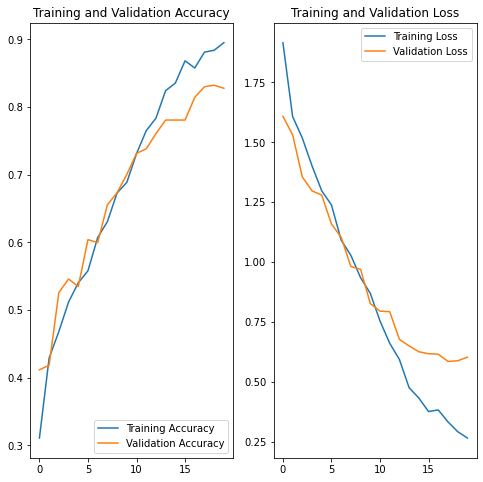

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### findings here

#### training accuracy is 0.8951
#### validation accuracy is 0.8277
#### model is overfit

In [25]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here


data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("vertical", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
])

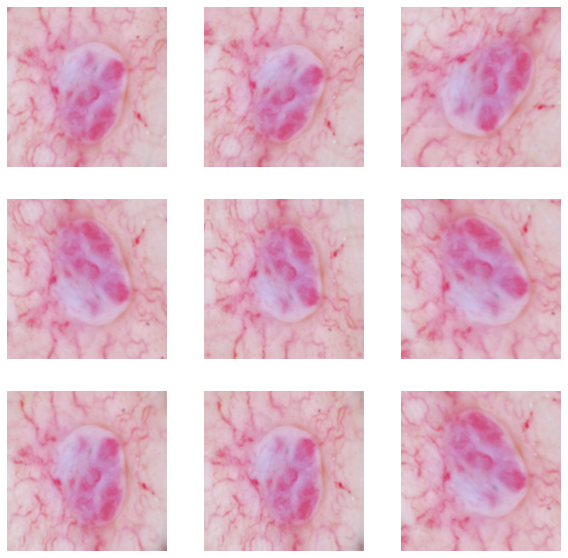

In [26]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [27]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.InputLayer(input_shape=(180, 180, 3)),  
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9, activation='softmax')
])


### Compiling the model

In [28]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Training the model

In [29]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 37s 597ms/step - loss: 1.9568 - accuracy: 0.2757 - val_loss: 1.7261 - val_accuracy: 0.3669
Epoch 2/20
56/56 [==============================] - 33s 590ms/step - loss: 1.6677 - accuracy: 0.4012 - val_loss: 1.5458 - val_accuracy: 0.4676
Epoch 3/20
56/56 [==============================] - 33s 596ms/step - loss: 1.5419 - accuracy: 0.4565 - val_loss: 1.5953 - val_accuracy: 0.4072
Epoch 4/20
56/56 [==============================] - 31s 552ms/step - loss: 1.4352 - accuracy: 0.4967 - val_loss: 1.3792 - val_accuracy: 0.5347
Epoch 5/20
56/56 [==============================] - 31s 557ms/step - loss: 1.3392 - accuracy: 0.5279 - val_loss: 1.3183 - val_accuracy: 0.5481
Epoch 6/20
56/56 [==============================] - 32s 569ms/step - loss: 1.3184 - accuracy: 0.5396 - val_loss: 1.2770 - val_accuracy: 0.5638
Epoch 7/20
56/56 [==============================] - 38s 675ms/step - loss: 1.2413 - accuracy: 0.5692 - val_loss: 1.2660 - val_accuracy: 0.5615

### Visualizing the results

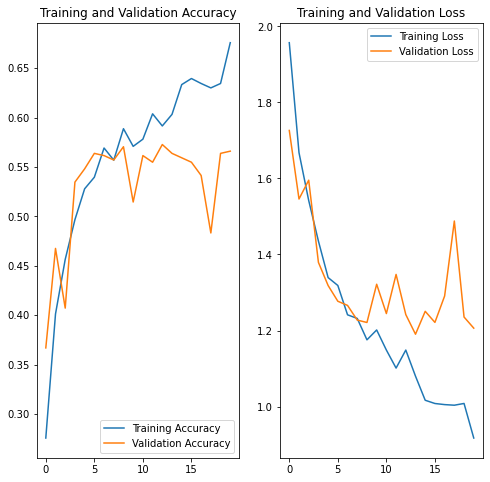

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### findings here

##### training accuracy is 0.6758
##### validation accuracy is 0.5660
##### model is underfit


##### We need to improve the model as class imbalance is present

# Class imbalance

In [31]:
## Your code goes here.

name = []
count = []
for path in list(data_dir_train.glob('*/')):
    name.append(str(path))
    count.append(len(list(path.glob('*.jpg'))))

df = pd.DataFrame({'name' : name, 'count':count})
df.head(9)

,name,count
0,Train\actinic keratosis,114
1,Train\basal cell carcinoma,376
2,Train\dermatofibroma,95
3,Train\melanoma,438
4,Train\nevus,357
5,Train\pigmented benign keratosis,462
6,Train\seborrheic keratosis,77
7,Train\squamous cell carcinoma,181
8,Train\vascular lesion,139


### Observations
#### - Least number of samples is seborrheic keratosis
#### - Pigmented benign keratosis classes dominate the data in terms proportionate number of samples


#### Rectify the class imbalance
#### Using `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.Adding 500 more samples in each class

In [32]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
from pathlib import Path
path_to_training_dataset=str(Path(data_dir_train).absolute())
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset +"\\"+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B399A8FE20>:   1%|          | 6/500 [00:00<00:55,  8.93 Samples/s]                  

Initialised with 114 image(s) found.
Output directory set to C:\Users\user\Desktop\upGrad\Main-Course\ML\DeepLearning\cnn\assignment\Train\actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B39BE67130>: 100%|██████████| 500/500 [00:06<00:00, 76.32 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B39BCB4580>:   0%|          | 2/500 [00:00<01:19,  6.25 Samples/s]

Initialised with 376 image(s) found.
Output directory set to C:\Users\user\Desktop\upGrad\Main-Course\ML\DeepLearning\cnn\assignment\Train\basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B39B00D040>: 100%|██████████| 500/500 [00:06<00:00, 73.09 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to C:\Users\user\Desktop\upGrad\Main-Course\ML\DeepLearning\cnn\assignment\Train\dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B39BC6E4C0>: 100%|██████████| 500/500 [00:07<00:00, 70.18 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to C:\Users\user\Desktop\upGrad\Main-Course\ML\DeepLearning\cnn\assignment\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B3A5BFC190>: 100%|██████████| 500/500 [00:34<00:00, 14.43 Samples/s]                   
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B399CBA0D0>:   0%|          | 1/500 [00:00<01:05,  7.63 Samples/s]

Initialised with 357 image(s) found.
Output directory set to C:\Users\user\Desktop\upGrad\Main-Course\ML\DeepLearning\cnn\assignment\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x1B39BE67910>: 100%|██████████| 500/500 [00:30<00:00, 16.38 Samples/s]                    
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B3A5B88580>:   2%|▏         | 9/500 [00:00<01:01,  8.00 Samples/s]                  

Initialised with 462 image(s) found.
Output directory set to C:\Users\user\Desktop\upGrad\Main-Course\ML\DeepLearning\cnn\assignment\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B39BCB42B0>: 100%|██████████| 500/500 [00:06<00:00, 72.14 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to C:\Users\user\Desktop\upGrad\Main-Course\ML\DeepLearning\cnn\assignment\Train\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1B39D05DF70>: 100%|██████████| 500/500 [00:16<00:00, 31.22 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B39BD639D0>:   1%|          | 4/500 [00:00<01:16,  6.45 Samples/s]

Initialised with 181 image(s) found.
Output directory set to C:\Users\user\Desktop\upGrad\Main-Course\ML\DeepLearning\cnn\assignment\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B39CFECD60>: 100%|██████████| 500/500 [00:06<00:00, 74.06 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to C:\Users\user\Desktop\upGrad\Main-Course\ML\DeepLearning\cnn\assignment\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B39CEFBDF0>: 100%|██████████| 500/500 [00:07<00:00, 69.63 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [34]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [35]:
data_dir_train = pathlib.Path('Train')
data_dir_test = pathlib.Path('Test')

### Lets see the distribution of augmented data after adding new images to the original training data.

In [36]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_05aa9ab6-9f20-421f-87d7-d4fed8a27a9a.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_75e51e55-ecf0-4eb4-8a0d-acd1f7de32a9.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_7c012258-c94b-498e-b6b2-def13ceba365.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_96f5946c-a8e2-4027-afdd-57d37fa2f5a8.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_97c737ea-3c78-457e-b598-b5527af2183c.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_a1912956-1c7f-4904-8096-4fab656a0133.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_a361de67-a985-425a-983e-ca55a1fc9691.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_cdbfbdbe-ad1d-4b13-89b0-78e14c256c69.jpg',
 'Train\\actinic

In [37]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [38]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [39]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [40]:
new_df['Label'].value_counts()


pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [41]:
data_dir_train

WindowsPath('Train')

In [42]:
batch_size = 32
img_height = 180
img_width = 180

In [43]:
image_size = (180, 180)

#### Create a training dataset

In [44]:

#data_dir_train=path_list_new
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=image_size,
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create a validation dataset

In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create your model (make sure to include normalization)

In [46]:
## your code goes here

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.InputLayer(input_shape=(180, 180, 3)),  
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9, activation='softmax')
])



#### Compiling model

In [47]:
## your code goes here
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### Train your model

In [48]:
epochs = 20
## Your code goes here, use 20 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 121s 691ms/step - loss: 1.8050 - accuracy: 0.3101 - val_loss: 1.5955 - val_accuracy: 0.3979
Epoch 2/20
169/169 [==============================] - 117s 687ms/step - loss: 1.4784 - accuracy: 0.4353 - val_loss: 1.3597 - val_accuracy: 0.5026
Epoch 3/20
169/169 [==============================] - 130s 766ms/step - loss: 1.3409 - accuracy: 0.4911 - val_loss: 1.2567 - val_accuracy: 0.5241
Epoch 4/20
169/169 [==============================] - 123s 723ms/step - loss: 1.3043 - accuracy: 0.5096 - val_loss: 1.2646 - val_accuracy: 0.5286
Epoch 5/20
169/169 [==============================] - 121s 711ms/step - loss: 1.2039 - accuracy: 0.5454 - val_loss: 1.1716 - val_accuracy: 0.5568
Epoch 6/20
169/169 [==============================] - 114s 671ms/step - loss: 1.1577 - accuracy: 0.5632 - val_loss: 1.1215 - val_accuracy: 0.5583
Epoch 7/20
169/169 [==============================] - 113s 665ms/step - loss: 1.0853 - accuracy: 0.5959 - val_loss: 1.0362 -

#### Visualize the model results

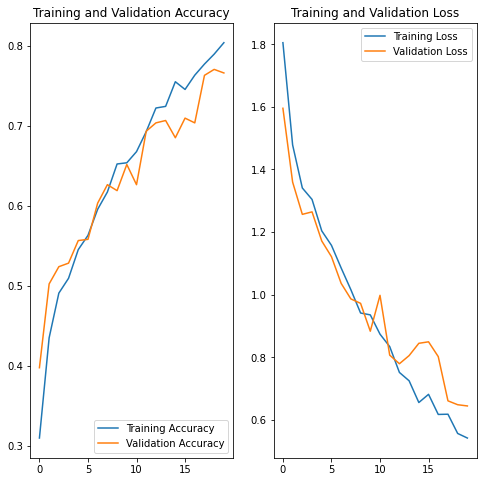

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### Conclusion
##### Model is improved as accuracy is : 0.8040 and validation accuracy is : 0.7661